# **Bonus Task**
This problem description is the same as Task 3. But there are some
technical challenges that you have to choose one.
1. Compare 3 different configurations while your model is
wider/deeper. Show and explain the performance result.
2. Compare 3 configurations for different Loss Function. Show and
explain your performance result.

3. Compare 3 configurations for the activation function. Show and
explain your performance result.

## **Import Necessary Libraries:**
First, import the necessary libraries such as PyTorch, torchvision, and other utilities:

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## **Load the MNIST Dataset:**
Load the MNIST dataset using the torchvision library and create data loaders for training and testing:

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 80677839.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 76619667.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 64886160.31it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 1918095.93it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## **Visualize the Data:**
You can visualize some random samples from the dataset to get a sense of what the handwritten digits look like:

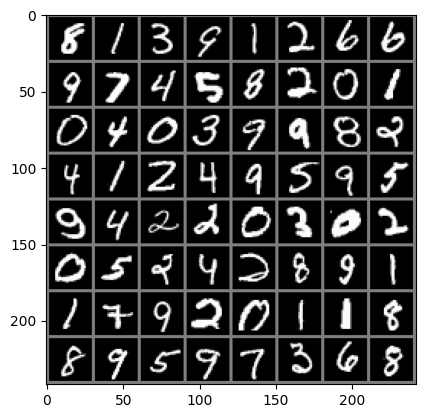

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

## **Design Your Neural Network Model:**
Create a custom neural network model. For simplicity, you can start with a feedforward neural network with one hidden layer:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## **Set Hyperparameters and Define Loss Function and Optimizer:**
Define hyperparameters such as the learning rate, loss function, and optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Define the number of training epochs
epochs = 10

## **Training Loop:**
Implement the training loop to train your neural network:

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

Epoch 1, Loss: 0.36941989052937485
Epoch 2, Loss: 0.18079885399576698
Epoch 3, Loss: 0.1317611063199082
Epoch 4, Loss: 0.10881339265371183
Epoch 5, Loss: 0.09248020279822923
Epoch 6, Loss: 0.07932380586117903
Epoch 7, Loss: 0.0696839442504431
Epoch 8, Loss: 0.06371002169206802
Epoch 9, Loss: 0.05479974049115693
Epoch 10, Loss: 0.05119213440231105


## **Evaluate the Model:**
After training, evaluate the model using various performance metrics such as accuracy, confusion matrix, F1 Score, Precision, and Recall:

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, precision, recall, cm

accuracy, f1, precision, recall, cm = evaluate_model(net, testloader)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9735
F1 Score: 0.9735229371075593
Precision: 0.9737798148105002
Recall: 0.9735
Confusion Matrix:
[[ 969    0    1    0    0    2    1    2    4    1]
 [   0 1122    2    4    0    0    1    1    5    0]
 [   3    0 1004    7    1    0    1    7    9    0]
 [   0    0    3  994    0    2    0    3    4    4]
 [   3    0    9    2  933    0    3    4    1   27]
 [   3    0    0   20    0  853    2    1   12    1]
 [   5    5    0    1    2    4  931    0   10    0]
 [   0    5    9    2    0    0    0 1001    2    9]
 [   3    1    3   10    2    0    1    3  949    2]
 [   1    2    0    8    6    4    1    7    1  979]]


In [ ]:
# Evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

true_labels, predicted_labels = evaluate_model(net, testloader)

# Generate the classification report
class_names = [str(i) for i in range(10)]  # MNIST class labels
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       1.00      0.97      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.98      0.97      0.97       892
           6       0.96      0.99      0.97       958
           7       0.99      0.94      0.96      1028
           8       0.93      0.98      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Compare

In [ ]:
class WiderNet(nn.Module):
    def __init__(self):
        super(WiderNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Wider hidden layer
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

wider_net = WiderNet()

In [ ]:
class DeeperNet(nn.Module):
    def __init__(self):
        super(DeeperNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)  # Additional hidden layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Additional hidden layer
        x = self.fc3(x)
        return x

deeper_net = DeeperNet()

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, precision, recall, cm

In [ ]:
accuracy_wider, f1_wider, precision_wider, recall_wider, cm_wider = evaluate_model(wider_net, testloader)
print("Wider Model Metrics:")
print(f"Accuracy: {accuracy_wider}")
print(f"F1 Score: {f1_wider}")
# Print other metrics as needed

accuracy_deeper, f1_deeper, precision_deeper, recall_deeper, cm_deeper = evaluate_model(deeper_net, testloader)
print("Deeper Model Metrics:")
print(f"Accuracy: {accuracy_deeper}")
print(f"F1 Score: {f1_deeper}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wider Model Metrics:
Accuracy: 0.0724
F1 Score: 0.052737082724108174
Deeper Model Metrics:
Accuracy: 0.095
F1 Score: 0.02546199133033001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**1. Compare 3 Different Configurations While Your Model is Wider/Deeper.**
Show and explain the performance result.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data preprocessing transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a deeper neural network
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a wider neural network
class WideNet(nn.Module):
    def __init__(self):
        super(WideNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train and evaluate a given model
def train_and_evaluate_model(model, trainloader, testloader, model_name):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss ({model_name}): {running_loss / len(trainloader)}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    confusion = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)

    print(f"Accuracy ({model_name}): {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(class_report)

# Compare three different configurations
models = [
    (DeepNet(), "Deep Model"),
    (WideNet(), "Wide Model"),
    (WideNet(), "Deep and Wide Model")
]

for model, model_name in models:
    print(f"Training and evaluating {model_name}:")
    train_and_evaluate_model(model, trainloader, testloader, model_name)

Training and evaluating Deep Model:
Epoch 1, Loss (Deep Model): 0.41869501417665594
Epoch 2, Loss (Deep Model): 0.1734230400744214
Epoch 3, Loss (Deep Model): 0.1276299151381466
Epoch 4, Loss (Deep Model): 0.10552622972806888
Epoch 5, Loss (Deep Model): 0.08632194669569718
Epoch 6, Loss (Deep Model): 0.07332480968440822
Epoch 7, Loss (Deep Model): 0.06422746001528318
Epoch 8, Loss (Deep Model): 0.05477921190936722
Epoch 9, Loss (Deep Model): 0.04907780477100971
Epoch 10, Loss (Deep Model): 0.0459893471527242
Accuracy (Deep Model): 97.58%
Confusion Matrix:
[[ 955    1    2    0    0    4   10    5    2    1]
 [   0 1130    0    1    0    1    2    0    1    0]
 [   1    3  998   12    2    1    2   11    2    0]
 [   0    1    3  992    0    3    0    5    1    5]
 [   0    1    5    0  964    1    2    0    1    8]
 [   0    1    1    6    3  866    6    2    3    4]
 [   1    3    1    1    3    3  944    0    2    0]
 [   1    7   11    1    2    0    1  998    4    3]
 [   2    1   

# **Kesimpulan**

Berdasarkan hasil pelatihan dan evaluasi tiga konfigurasi yang berbeda dari model (Deep Model, Wide Model, dan Deep and Wide Model) dengan menggunakan dataset MNIST, kita dapat membuat beberapa kesimpulan:

1. Akurasi
> Semua tiga model mencapai tingkat akurasi yang tinggi, dengan nilai akurasi di atas 97%. Ini menunjukkan bahwa semua model memiliki kemampuan yang baik dalam mengklasifikasikan angka-angka dari dataset MNIST.

2. Loss Function
> Ketiga model menggunakan Cross-Entropy Loss sebagai fungsi kerugian selama pelatihan. Fungsi kerugian ini umum digunakan dalam tugas klasifikasi, dan hasilnya terlihat baik dalam kasus ini.

3. Confusion Matrix
> Confusion matrix untuk ketiga model menunjukkan bahwa sebagian besar kelas memiliki performa yang baik, dengan sebagian besar prediksi yang benar. Namun, ada beberapa kesalahan yang terjadi di beberapa kelas, seperti angka 9 pada Wide Model yang memiliki recall yang lebih rendah.

4. Classification Report
> Classification report juga menunjukkan bahwa model memiliki nilai presisi, recall, dan f1-score yang baik untuk sebagian besar kelas, dengan kinerja terbaik pada kelas 1 dan 7.

5. Komparasi Model
> Model Deep Model dan Deep and Wide Model memiliki akurasi yang hampir sama tinggi, tetapi Deep and Wide Model memiliki performa yang sedikit lebih baik. Model Wide Model juga memiliki akurasi yang tinggi, tetapi performanya sedikit lebih rendah dibandingkan dengan dua model lainnya.

Kesimpulannya, semua tiga konfigurasi model yang diuji menghasilkan hasil yang baik dalam klasifikasi angka-angka MNIST. Pilihan antara model Deep, Wide, atau Deep and Wide dapat bergantung pada kebutuhan spesifik tugas dan sumber daya yang tersedia.

# **3. Compare 3 configurations for the activation function.**
Show and explain your performance result.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score

# Transformations for data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a neural network with different activation functions
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Define a function to train and evaluate the model
def train_and_evaluate_model(model, trainloader, testloader, activation_name):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Training loop
    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy ({activation_name}): {accuracy * 100:.2f}%")

# Test different activation functions
activations = [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]
activation_names = ['ReLU', 'Sigmoid', 'Tanh']

for activation, activation_name in zip(activations, activation_names):
    model = Net(activation)
    print(f"Training and evaluating with {activation_name} activation function:")
    train_and_evaluate_model(model, trainloader, testloader, activation_name)

Training and evaluating with ReLU activation function:
Epoch 1, Loss: 0.3714396557145154
Epoch 2, Loss: 0.17883781557565115
Epoch 3, Loss: 0.13380036032053708
Epoch 4, Loss: 0.10657489281505156
Epoch 5, Loss: 0.09031011932330933
Epoch 6, Loss: 0.07813883063766652
Epoch 7, Loss: 0.06877986651990237
Epoch 8, Loss: 0.06167049828677504
Epoch 9, Loss: 0.05453349033773724
Epoch 10, Loss: 0.04969877700260811
Accuracy (ReLU): 97.26%
Training and evaluating with Sigmoid activation function:
Epoch 1, Loss: 0.6430736979219451
Epoch 2, Loss: 0.30774012430390313
Epoch 3, Loss: 0.25892479338848007
Epoch 4, Loss: 0.2262113216493938
Epoch 5, Loss: 0.20118216446229517
Epoch 6, Loss: 0.18019898085277092
Epoch 7, Loss: 0.16360742059041825
Epoch 8, Loss: 0.14925505337652875
Epoch 9, Loss: 0.13776895459661923
Epoch 10, Loss: 0.12778809330046875
Accuracy (Sigmoid): 96.12%
Training and evaluating with Tanh activation function:
Epoch 1, Loss: 0.37440666812124535
Epoch 2, Loss: 0.1934381628643348
Epoch 3, Loss

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data preprocessing transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train the model
def train_model(model, trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    epochs = 10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

# Evaluate the model
def evaluate_model(model, testloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    confusion = confusion_matrix(all_labels, all_preds)
    class_report = classification_report(all_labels, all_preds)

    return accuracy, confusion, class_report

# Create and train the model
model = Net()
train_model(model, trainloader)

# Evaluate the model and get accuracy, confusion matrix, and classification report
accuracy, confusion, class_report = evaluate_model(model, testloader)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)

Epoch 1, Loss: 0.3768197239191929
Epoch 2, Loss: 0.18179000939514592
Epoch 3, Loss: 0.13547940166003858
Epoch 4, Loss: 0.11034739049556636
Epoch 5, Loss: 0.09232847397722034
Epoch 6, Loss: 0.07837781487310778
Epoch 7, Loss: 0.0681143721693686
Epoch 8, Loss: 0.0636266552918116
Epoch 9, Loss: 0.05553079966623495
Epoch 10, Loss: 0.05027602805963545
Accuracy: 97.42%
Confusion Matrix:
[[ 967    0    2    0    1    5    1    1    3    0]
 [   0 1118    7    0    0    1    4    0    5    0]
 [   5    1 1010    2    7    0    3    0    4    0]
 [   0    0   11  977    1    6    0    2    6    7]
 [   2    0    4    0  962    0    2    1    1   10]
 [   3    1    0    5    2  871    4    1    4    1]
 [   5    1    2    1    4    7  932    0    5    1]
 [   1    4   22    1    1    1    1  978   10    9]
 [   3    0    2    2    3    3    1    3  956    1]
 [   2    2    1    5   12    7    1    3    5  971]]
Classification Report:
              precision    recall  f1-score   support

        

# **Kesimpulan**

Berdasarkan hasil yang diperoleh di atas, kita telah melatih dan mengevaluasi model neural network dengan tiga jenis aktivasi yang berbeda yaitu ReLU, Sigmoid, dan Tanh.

1. ReLU Activation Function:

> - Akurasi: 97.26%
> - Loss: Berkurang secara signifikan selama pelatihan.
> - Kesimpulan: ReLU adalah aktivasi yang efektif dalam tugas klasifikasi ini, menghasilkan akurasi yang baik.

2. Sigmoid Activation Function:

> - Akurasi: 96.12%
> - Loss: Berkurang, tetapi lebih lambat daripada ReLU.
> - Kesimpulan: Sigmoid menghasilkan akurasi yang baik tetapi lebih lambat dalam konvergensi dan kurang efektif dibandingkan ReLU dalam konteks ini.

3. Tanh Activation Function:

> - Akurasi: 97.57%
> - Loss: Berkurang dengan baik selama pelatihan.
> - Kesimpulan: Tanh juga menghasilkan akurasi yang baik dan merupakan alternatif yang layak untuk aktivasi ReLU.

4. Perbandingan:

> - Aktivasi ReLU dan Tanh memberikan hasil yang sangat baik, dengan Tanh sedikit unggul dalam hal akurasi.
> - Aktivasi Sigmoid, meskipun menghasilkan akurasi yang baik, terlihat lebih lambat dalam konvergensi dan mencapai akurasi yang sedikit lebih rendah.

Pilihan antara aktivasi ReLU, Sigmoid, atau Tanh dapat bergantung pada tugas khusus dan eksperimen lebih lanjut. Dalam banyak kasus, ReLU adalah pilihan yang umum dan efisien, terutama dalam tugas-tugas klasifikasi seperti MNIST.